## Analiza klientów pod kątem ich retencji.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

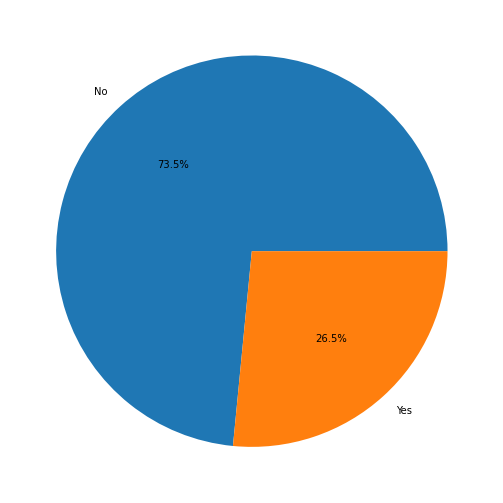

In [37]:
plt.figure(figsize=(12,9))
plt.pie(df['Churn'].value_counts(sort=True), labels = df['Churn'].value_counts(sort=True).index, autopct = '%1.1f%%');

In [8]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Mamy 7043 rekordów w bazie. Dane się nie powtarzają i w większości są kompletne. 5174 osób pozostało klientami sklepu co stanowi 73,5 %, 1869 odeszło czyli 26,5%.
Stworzymy drugą bazę z podsumowaniem.

In [12]:
df_copy = df.copy()
df_copy = df_copy.drop(['customerID','MonthlyCharges', 'TotalCharges', 'tenure'], axis = 1)
df_copy

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [20]:
summary = pd.concat([pd.crosstab(df_copy[x], df_copy.Churn) for x in df_copy.columns[:-1]], keys=df_copy.columns[:-1])
summary['Percentage'] = round((summary['Yes'] / (summary['Yes'] + summary["No"])) * 100, 1)
summary

Churn                                         No   Yes  Percentage
gender           Female                     2549   939        26.9
                 Male                       2625   930        26.2
SeniorCitizen    0                          4508  1393        23.6
                 1                           666   476        41.7
Partner          No                         2441  1200        33.0
                 Yes                        2733   669        19.7
Dependents       No                         3390  1543        31.3
                 Yes                        1784   326        15.5
PhoneService     No                          512   170        24.9
                 Yes                        4662  1699        26.7
MultipleLines    No                         2541   849        25.0
                 No phone service            512   170        24.9
                 Yes                        2121   850        28.6
InternetService  DSL                        1962   459        19.0
                 Fiber optic                1799  1297        41.9
                 No                         1413   113         7.4
OnlineSecurity   No                         2037  1461        41.8
                 No internet service        1413   113         7.4
                 Yes                        1724   295        14.6
OnlineBackup     No                         1855  1233        39.9
                 No internet service        1413   113         7.4
                 Yes                        1906   523        21.5
DeviceProtection No                         1884  1211        39.1
                 No internet service        1413   113         7.4
                 Yes                        1877   545        22.5
TechSupport      No                         2027  1446        41.6
                 No internet service        1413   113         7.4
                 Yes                        1734   310        15.2
StreamingTV      No                         1868   942        33.5
                 No internet service        1413   113         7.4
                 Yes                        1893   814        30.1
StreamingMovies  No                         1847   938        33.7
                 No internet service        1413   113         7.4
                 Yes                        1914   818        29.9
Contract         Month-to-month             2220  1655        42.7
                 One year                   1307   166        11.3
                 Two year                   1647    48         2.8
PaperlessBilling No                         2403   469        16.3
                 Yes                        2771  1400        33.6
PaymentMethod    Bank transfer (automatic)  1286   258        16.7
                 Credit card (automatic)    1290   232        15.2
                 Electronic check           1294  1071        45.3
                 Mailed check               1304   308        19.1

Osoby starsze częściej rezygnują od młodszych. Na dodatek brak wsparcia technicznego i zabezpieczeń przyczyniają się do rezygnacji.

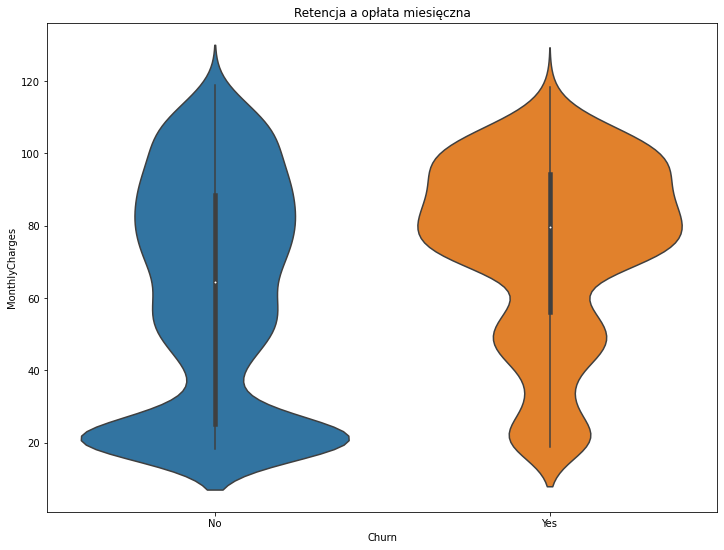

In [36]:
plt.figure(figsize=(12,9))

sns.violinplot(x='Churn', y='MonthlyCharges', data = df)
plt.title('Retencja a opłata miesięczna');

Retencja jest wyższa wśród klientów z niższą opłatą.

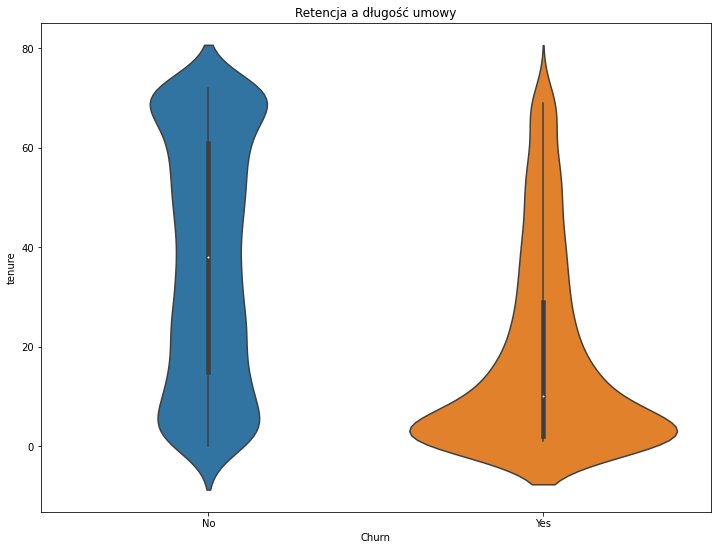

In [35]:
plt.figure(figsize=(12,9))

sns.violinplot(x='Churn', y='tenure', data = df)
plt.title('Retencja a długość umowy');

Najczęściej odchodzą nowi klienci.
Mamy 11 wierszy bez wartości TotalCharges. Zostaną usunięte.

In [58]:
df = df[df['TotalCharges'] != ' ']
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Skonfigurujemy naszą bazę danych do użycia w modelu regresji logistycznej.

In [151]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)
# df = df.drop(['customerID'], axis = 1)
df_ml = pd.get_dummies(data = df, drop_first = True)


In [152]:
y = df_ml['Churn_Yes'].values
X = df_ml.drop(['Churn_Yes'], axis = 1)

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

array([[-0.44032709, -1.28024804, -1.16169394, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.44032709,  0.06430269, -0.26087792, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709, -1.23950408, -0.36392329, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [-0.44032709, -0.87280842, -1.17000405, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 2.27103902, -1.15801615,  0.31916782, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709,  1.36810945,  1.35793167, ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3)

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
result = model.fit(X_train, y_train)

prediction = model.predict(X_test)
score = model.score(X_test, y_test)

In [163]:
print("Dokładność = " + str(score))

Dokładność = 0.8085308056872038


In [156]:
confusion_matrix(y_test, prediction)

array([[1387,  159],
       [ 245,  319]], dtype=int64)

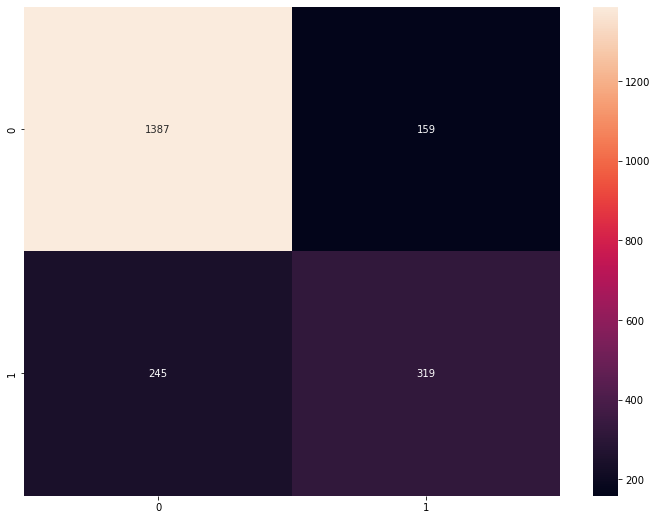

In [157]:
plt.figure(figsize=(12,9))

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g',);

In [158]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1546
           1       0.67      0.57      0.61       564

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



Sprawdźmy jakie cechy miały największą wartość.

<AxesSubplot:>

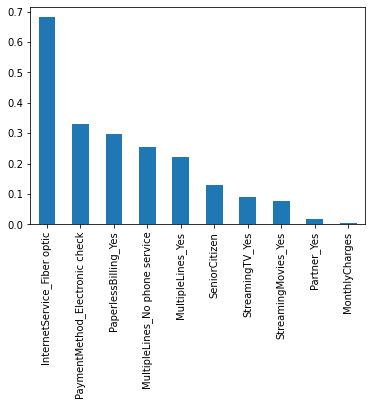

In [159]:
weights = pd.Series(model.coef_[0], index = X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar')

<AxesSubplot:>

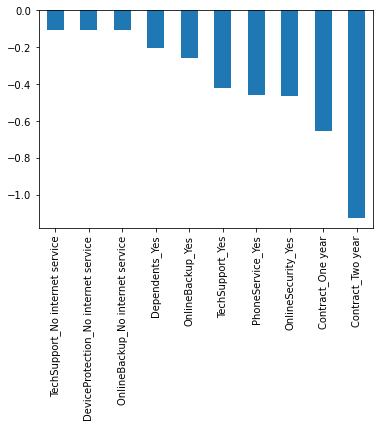

In [162]:
weights.sort_values(ascending = False)[-10:].plot(kind='bar')

## Sprawdźmy jak poradzi sobie model lasu losowego.

In [164]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3)

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

prediction = model.predict(X_test)
score = model.score(X_test, y_test)

print("Dokładność = " + str(score))


Dokładność = 0.8009478672985783


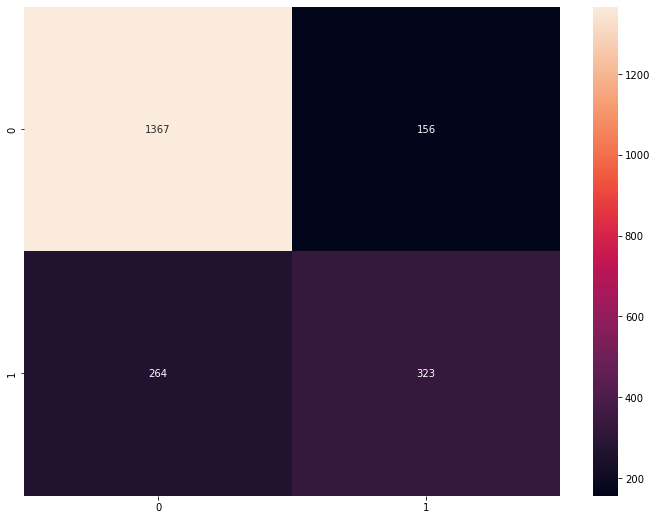

In [165]:
plt.figure(figsize=(12,9))

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g',);

In [166]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1523
           1       0.67      0.55      0.61       587

    accuracy                           0.80      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.79      0.80      0.79      2110



<AxesSubplot:>

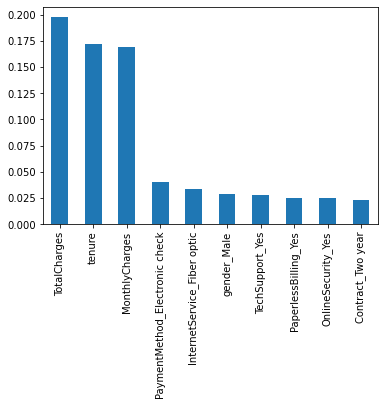

In [167]:
importances = model_rf.feature_importances_
weights = pd.Series(importances, index = X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar')

Modele mają podobną dokładność - 80%.
